In [1]:
#Probamos otro tipo de limpieza por si la predicion cambia

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pickle
import joblib

from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler

# Preprocessing 
from sklearn.preprocessing import MinMaxScaler , LabelEncoder , StandardScaler



In [3]:
data = pd.read_csv("../data/diamonds_train.csv")

In [4]:
data = data[['carat',
             'cut', 
             'color', 
             'clarity', 
             'depth', 
             'table', 
             'x', 
             'y', 
             'z', 
             'price']]
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,Premium,J,VS2,62.4,58.0,6.83,6.79,4.25,4268
1,0.32,Very Good,H,VS2,63.0,57.0,4.35,4.38,2.75,505
2,0.71,Fair,G,VS1,65.5,55.0,5.62,5.53,3.65,2686
3,0.41,Good,D,SI1,63.8,56.0,4.68,4.72,3.00,738
4,1.02,Ideal,G,SI1,60.5,59.0,6.55,6.51,3.95,4882


In [5]:
data["size"] = data["x"] * data["y"] * data["z"]
data

,carat,cut,color,clarity,depth,table,x,y,z,price,size
0,1.21,Premium,J,VS2,62.4,58.0,6.83,6.79,4.25,4268,197.096725
1,0.32,Very Good,H,VS2,63.0,57.0,4.35,4.38,2.75,505,52.395750
2,0.71,Fair,G,VS1,65.5,55.0,5.62,5.53,3.65,2686,113.436890
3,0.41,Good,D,SI1,63.8,56.0,4.68,4.72,3.00,738,66.268800
4,1.02,Ideal,G,SI1,60.5,59.0,6.55,6.51,3.95,4882,168.429975
...,...,...,...,...,...,...,...,...,...,...,...
40450,1.34,Ideal,G,VS1,62.7,57.0,7.10,7.04,4.43,10070,221.429120
40451,2.02,Good,F,SI2,57.1,60.0,8.31,8.25,4.73,12615,324.276975
40452,1.01,Ideal,H,SI1,62.7,56.0,6.37,6.42,4.01,5457,163.990554
40453,0.33,Ideal,J,VS1,61.9,54.3,4.45,4.47,2.76,456,54.900540


In [6]:
data = data[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'size']]
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   size     40455 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 2.5+ MB


## Encode data

In [7]:
# Columnas categóricas
cat_col = ['cut', 'clarity', 'color']

# Inicializar LabelEncoder
le = LabelEncoder()

# Aplicar LabelEncoder a las columnas categóricas
for col in cat_col:
    data[col] = le.fit_transform(data[col])

# Información del DataFrame después de la codificación
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  int64  
 2   color    40455 non-null  int64  
 3   clarity  40455 non-null  int64  
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   size     40455 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 2.5 MB


/var/folders/1m/9tdt_k994v175ff72qvvlr7r0000gn/T/ipykernel_91503/3521151496.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
/var/folders/1m/9tdt_k994v175ff72qvvlr7r0000gn/T/ipykernel_91503/3521151496.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
/var/folders/1m/9tdt_k994v175ff72qvvlr7r0000gn/T/ipykernel_91503/3521151496.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

## Train Test Split

In [8]:
X = data.drop('price', axis=1)
y = data['price'] 
# Your code here:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")


X_train: (32364, 7), X_test: (8091, 7), y_train: (32364,), y_test: (8091,)


## Scaling Data

In [9]:
'''No voy a utilizar el scaler
# Scale Data 
scaler = MinMaxScaler()
#USing Loop
for col in X_train.columns:
    X_train[col] = scaler.fit_transform(X_train[[col]])
for col in X_test.columns:
    X_test[col] = scaler.fit_transform(X_test[[col]])
# Print HEad
X_train.head()'''

'No voy a utilizar el scaler\n# Scale Data \nscaler = MinMaxScaler()\n#USing Loop\nfor col in X_train.columns:\n    X_train[col] = scaler.fit_transform(X_train[[col]])\nfor col in X_test.columns:\n    X_test[col] = scaler.fit_transform(X_test[[col]])\n# Print HEad\nX_train.head()'

In [10]:
# X_train Shape
X_train.shape

(32364, 7)

## Training And Compiling

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# Apply Random Forest Regression
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
# Make predictions on the test set
predictions = random_forest_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 298451.49154391565
R-squared: 0.9816729975278445


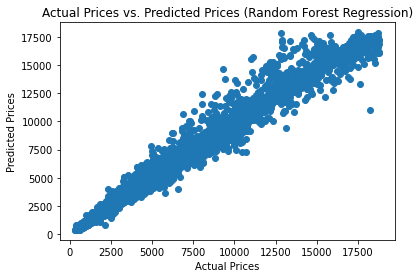

In [14]:
# Visualize predictions against actual values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices (Random Forest Regression)')
plt.show()

# Examinamos train


In [15]:
data = pd.read_csv("../data/diamonds_test.csv")

In [16]:
data = data[['carat',
             'cut', 
             'color', 
             'clarity', 
             'depth', 
             'table', 
             'x', 
             'y', 
             'z']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    13485 non-null  float64
 1   cut      13485 non-null  object 
 2   color    13485 non-null  object 
 3   clarity  13485 non-null  object 
 4   depth    13485 non-null  float64
 5   table    13485 non-null  float64
 6   x        13485 non-null  float64
 7   y        13485 non-null  float64
 8   z        13485 non-null  float64
dtypes: float64(6), object(3)
memory usage: 948.3+ KB


In [17]:
#Shape 
print(f'The shape of the data is {data.shape}')
print(f'The number of Rows is {data.shape[0]}')
print(f'The number of Columns is {data.shape[1]}')

The shape of the data is (13485, 9)
The number of Rows is 13485
The number of Columns is 9


In [18]:
# Enocde Data 
cat_col = ['cut','clarity','color']

#Label Encoder
le = LabelEncoder()
for col in cat_col:
    data[col] = le.fit_transform(data[col])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    13485 non-null  float64
 1   cut      13485 non-null  int64  
 2   color    13485 non-null  int64  
 3   clarity  13485 non-null  int64  
 4   depth    13485 non-null  float64
 5   table    13485 non-null  float64
 6   x        13485 non-null  float64
 7   y        13485 non-null  float64
 8   z        13485 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 948.3 KB


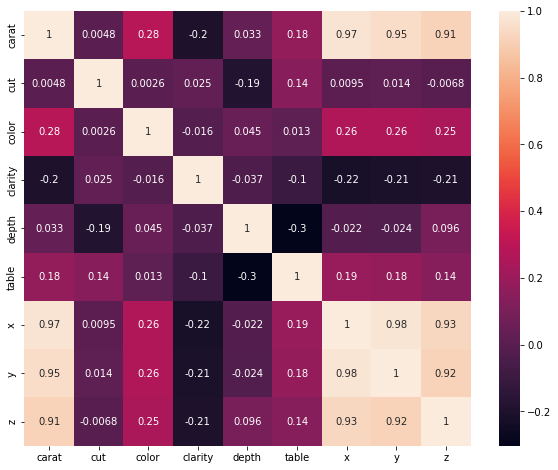

In [19]:
#Correlation
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [20]:
# Split Data
X = data.drop('carat',axis=1)
y = data['carat']

# Train Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Scale Data 
scaler = MinMaxScaler()
#USing Loop
for col in X_train.columns:
    X_train[col] = scaler.fit_transform(X_train[[col]])
for col in X_test.columns:
    X_test[col] = scaler.fit_transform(X_test[[col]])
# Print HEad
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10788 entries, 11672 to 7270
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cut      10788 non-null  float64
 1   color    10788 non-null  float64
 2   clarity  10788 non-null  float64
 3   depth    10788 non-null  float64
 4   table    10788 non-null  float64
 5   x        10788 non-null  float64
 6   y        10788 non-null  float64
 7   z        10788 non-null  float64
dtypes: float64(8)
memory usage: 758.5 KB


In [22]:
predictions = random_forest_model.predict(data)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- x
- y
- z
Feature names seen at fit time, yet now missing:
- size


In [ ]:
predictions = pd.DataFrame(predictions, columns=['price'])

In [ ]:
predictions['id'] = range(0, len(predictions))
predictions

In [ ]:
predictions = predictions[['id', 'price']]
predictions

In [ ]:
predictions.to_csv('../data/submission/submission_NLimRFR_MSR_149815_.csv', index = False)